In [16]:

# Feature scaling is one of the most important data preprocessing step in machine learning. 
# Algorithms that compute the distance between the features are biased towards numerically larger 
# values if the data is not scaled.

# There are several ways to do feature scaling. Some of the more popular techniques include:
# Absolute Maximum Scaling
# Min-Max Scaling
# Normalization
# Standardization
# Robust Scaling


In [24]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import seaborn as sb
import scipy
from scipy.stats import spearmanr
from sklearn import datasets
import statsmodels.api as sm
import numpy as np
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
print(df.columns)
df.head()


Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [18]:

# Let's reshare our dataframe aso we can look at outliers

df_stacked = pd.melt(df)
df_stacked


,variable,value
0,mpg,21.0
1,mpg,21.0
2,mpg,22.8
3,mpg,21.4
4,mpg,18.7
...,...,...
347,carb,2.0
348,carb,4.0
349,carb,6.0
350,carb,8.0


In [19]:

# Here we can see the distributions of the dataset, inclusing outliers

import plotly.express as px

fig = px.box(df_stacked, x="variable", y="value", color="variable")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()


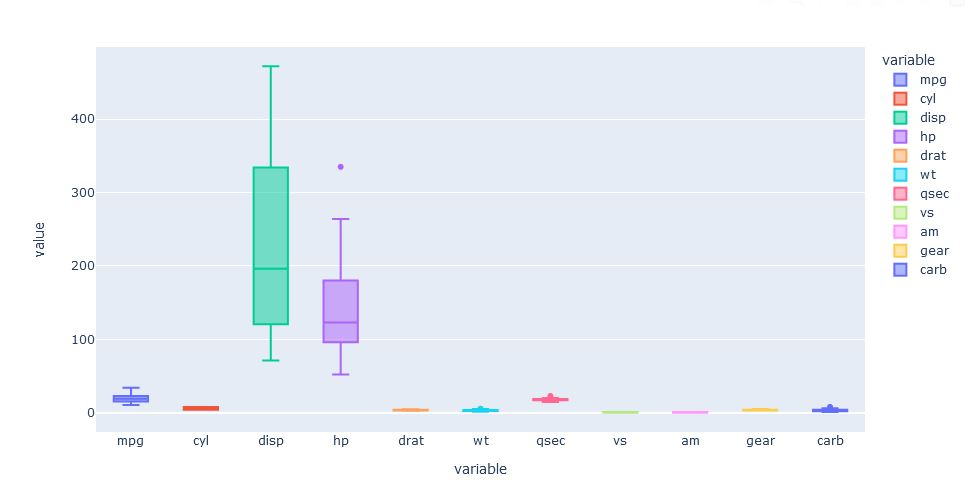

In [43]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = 'C:\\Users\\'
Image(filename = PATH + "1.JPG", width=800, height=800)


In [25]:

# Here, with no scaling applied, we can see that the Root Mean Square Error is higher than we see in 
# the example below.

y = df['mpg']
df.drop('mpg',axis=1,inplace=True)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
rmse


3.1847333937160287

In [26]:

# Normalization...
# Now, after applying the MinMaxScaler, we can see that the Root Mean Square Error is lower than we see in 
# the example above.

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(df)
df = sc.transform(df)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
rmse


3.102560133841517

In [40]:

# Standardization...
# Now, after applying the StandardScaler, we can see that the Root Mean Square Error is even lower than we see in 
# the example above.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df = sc.transform(df)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
rmse


2.592765823098643

In [29]:

df_from_array = pd.DataFrame(df, columns=[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear','carb']])
df_from_array.head()


,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967
1,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967
2,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108
3,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108
4,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083


In [33]:

df_stacked = pd.melt(df_from_array)
df_stacked.columns=['variable','value']
df_stacked.head()


,variable,value
0,cyl,-0.106668
1,cyl,-0.106668
2,cyl,-1.244457
3,cyl,-0.106668
4,cyl,1.031121


In [34]:

# Now, we can see clearly that everything is pretty much scaled relative to everything else, so 'disp' and 'hp' no 
# longer dominate the other features in the dataframe.

import plotly.express as px

fig = px.box(df_stacked, x="variable", y="value", color="variable")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()


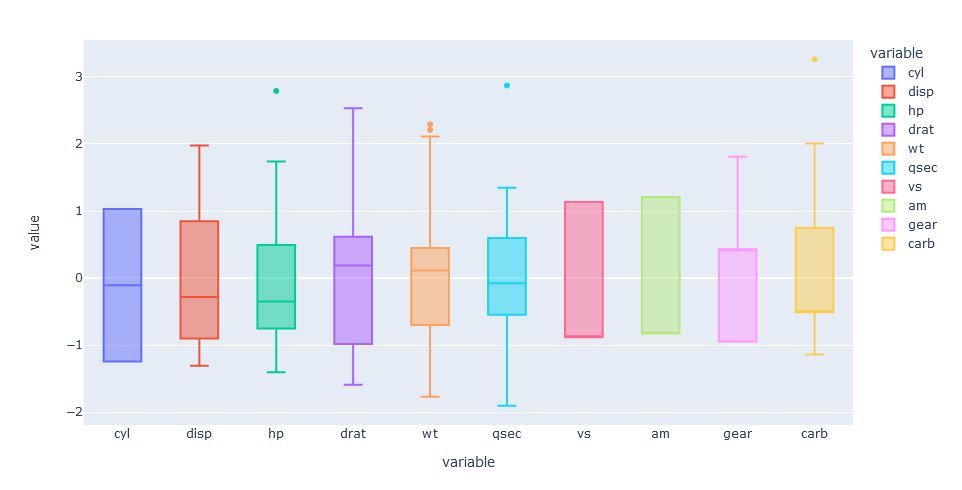

In [44]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = 'C:\\Users\\'
Image(filename = PATH + "2.JPG", width=800, height=800)


In [ ]:

# Normalization...
# It is the process of rescaling values between [0, 1].
# Why normalization?

# Normalization makes training less sensitive to the scale of features, so we can better solve for coefficients. 
# Outliers are gone, but still remain visible within the normalized data.
# The use of a normalization method will improve analysis for some models.
# Normalizing will ensure that a convergence problem does not have a massive variance, making optimization feasible.

# Standardization...
# It is the process of rescaling the features so that they’ll have the properties of a Gaussian distribution 
# with μ=0 and σ=1.
# Why standardization?

# Compare features that have different units or scales.
# Standardizing tends to make the training process well behaved because the numerical condition of the 
# optimization problems is improved.

# Differences...
# Sometimes, when normalization does not work, standardization might do the work.
# When using standardization, your new data aren’t bounded (unlike normalization).
    